# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Setup a flexibe url variable to iterate through cities from openweather.com
# and set units to Fahrenheit
index = 0
set_num = 1
url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}'

city_info = []

for city in cities:
    city_name = city
    index += 1
    if index % 100 == 0:
        set_num += 1
    #make the url for each specific city in the list of cities
    city_url = url + "&q=" + city
    #make the print log
    print(f'Processing Record {index} of Set {set_num} | {city}')
    
    
    #Run the API request for info on each city in the list cities
    try:
        weather = requests.get(city_url).json()
        
        #extract the data on weather/latitude for each city
        city_temp = weather['main']['temp_max']
        #print(city_temp)
        city_lat = weather['coord']['lat']
        #print(city_lat)
        city_humid = weather['main']['humidity']
        #print(city_humid)
        city_cloud = weather['clouds']['all']
        #print(city_cloud)
        city_wind_spd = weather['wind']['speed']
        #print(city_wind_spd)
        longitude = weather['coord']['lon']
        
        #extract the city information into the city_info list
        #which will become a list of dictionaries we can convert to
        #a pandas dataframe
        city_info.append({
            
            "City": city_name,
            "Max Temperature" : city_temp,
            "Latitude" : city_lat,
            "Longitude" : longitude,
            "Humidity" : city_humid,
            "Cloud %" : city_cloud,
            "Wind Speed" : city_wind_spd
            
        })
    except:
        print('not on openweather')
        
print('--------------')
print('City Data Loading Finished')
#print(city_info)    

Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | jerecuaro
Processing Record 5 of Set 1 | bantry
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | sur
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | port hedland
Processing Record 16 of Set 1 | maghama
not on openweather
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | formoso do araguaia
not on openweather
Processing Record 19 of Set 1 | sola
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | cabo san lucas
Processing Record 23 of Set 1 | benguela
Processing Record 24 of Set 1 

Processing Record 188 of Set 2 | ruatoria
not on openweather
Processing Record 189 of Set 2 | matay
Processing Record 190 of Set 2 | talcher
Processing Record 191 of Set 2 | vaitupu
not on openweather
Processing Record 192 of Set 2 | zhangzhou
Processing Record 193 of Set 2 | tazovskiy
Processing Record 194 of Set 2 | las vegas
Processing Record 195 of Set 2 | seminole
Processing Record 196 of Set 2 | rognan
Processing Record 197 of Set 2 | carnarvon
Processing Record 198 of Set 2 | vagur
Processing Record 199 of Set 2 | lolua
not on openweather
Processing Record 200 of Set 3 | rodrigues alves
Processing Record 201 of Set 3 | bethel
Processing Record 202 of Set 3 | marathon
Processing Record 203 of Set 3 | vila do maio
Processing Record 204 of Set 3 | tezu
Processing Record 205 of Set 3 | bandarbeyla
Processing Record 206 of Set 3 | tasiilaq
Processing Record 207 of Set 3 | kushmurun
Processing Record 208 of Set 3 | livingstonia
Processing Record 209 of Set 3 | bambous virieux
Processi

Processing Record 378 of Set 4 | bundaberg
Processing Record 379 of Set 4 | san cristobal
Processing Record 380 of Set 4 | wanning
Processing Record 381 of Set 4 | yanchukan
not on openweather
Processing Record 382 of Set 4 | manicore
Processing Record 383 of Set 4 | broken hill
Processing Record 384 of Set 4 | praia da vitoria
Processing Record 385 of Set 4 | hualmay
Processing Record 386 of Set 4 | mount gambier
Processing Record 387 of Set 4 | san andres
Processing Record 388 of Set 4 | medina
Processing Record 389 of Set 4 | shimoda
Processing Record 390 of Set 4 | sorvag
not on openweather
Processing Record 391 of Set 4 | raga
Processing Record 392 of Set 4 | miri
Processing Record 393 of Set 4 | zhigansk
Processing Record 394 of Set 4 | tapes
Processing Record 395 of Set 4 | chapais
Processing Record 396 of Set 4 | aswan
Processing Record 397 of Set 4 | ifanadiana
Processing Record 398 of Set 4 | lensk
Processing Record 399 of Set 4 | roebourne
Processing Record 400 of Set 5 | ha

Processing Record 566 of Set 6 | vostok
Processing Record 567 of Set 6 | carire
Processing Record 568 of Set 6 | saint-georges
Processing Record 569 of Set 6 | gornyy
Processing Record 570 of Set 6 | komsomolskiy
Processing Record 571 of Set 6 | umarkot
Processing Record 572 of Set 6 | guozhen
Processing Record 573 of Set 6 | marawi
Processing Record 574 of Set 6 | zaragoza
Processing Record 575 of Set 6 | maragogi
Processing Record 576 of Set 6 | karaidel
Processing Record 577 of Set 6 | cacu
Processing Record 578 of Set 6 | kloulklubed
Processing Record 579 of Set 6 | igarape-miri
not on openweather
Processing Record 580 of Set 6 | puerto escondido
Processing Record 581 of Set 6 | toora-khem
Processing Record 582 of Set 6 | storm lake
Processing Record 583 of Set 6 | katangli
Processing Record 584 of Set 6 | sao joao da barra
Processing Record 585 of Set 6 | zhezkazgan
Processing Record 586 of Set 6 | kavaratti
Processing Record 587 of Set 6 | zverinogolovskoye
Processing Record 588 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame(city_info)
city_data.head()

city_data.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_values = city_data['Humidity'].unique()
print(max(humidity_values))

100


In [ ]:
#There are no cities with over 100% humidity

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
#make variables for the columns in the city-data dataframe
latitude = city_data['Latitude']
max_temp = city_data['Max Temperature']
city = city_data['City']
humidity = city_data['Humidity']
clouds = city_data['Cloud %']
wind_spd = city_data['Wind Speed']
dates = city_data['Longitude']

## Latitude vs. Temperature Plot

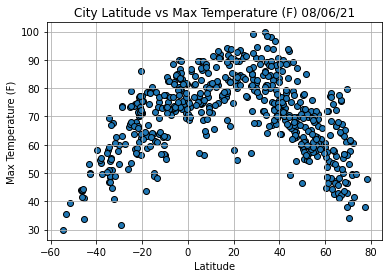

In [8]:
plt.scatter(latitude, max_temp, edgecolor = 'black')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Max Temperature (F) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save the graph
plt.savefig("output_data/max_temp_scatter.png")

The highest maximum temperatures tend to be between the equator and a latitude of 40 degrees in this sample.


## Latitude vs. Humidity Plot

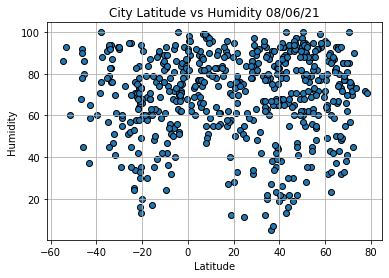

In [9]:
plt.scatter(latitude, humidity, edgecolor = 'black')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Humidity {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#save the graph
plt.savefig("output_data/humidity_scatter.png")

None of the least humid cities are on the equator, and the most humid cities in this sample begin to appear 20 degrees north and south of the equator.

## Latitude vs. Cloudiness Plot

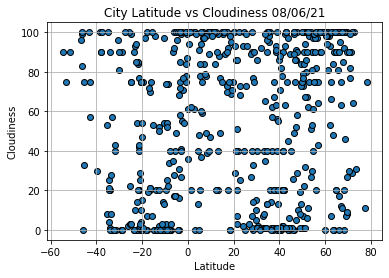

In [10]:
plt.scatter(latitude, clouds, edgecolor = 'black')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Cloudiness {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#save the graph
plt.savefig("output_data/cloud_scatter.png")

Most cities with the least cloudines have a latitude of -35 to -5 degrees and 20 to 50 degrees. Conversely, most cities with the highest cloudiness have a latitude of 0 to 25 degrees and 50 to 75 degrees.

## Latitude vs. Wind Speed Plot

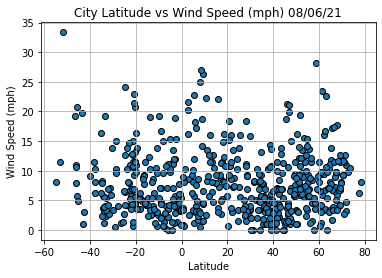

In [11]:
plt.scatter(latitude, wind_spd, edgecolor = 'black')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Wind Speed (mph) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save the graph
plt.savefig("output_data/wind_speed_scatter.png")

There does not seem to be a strong correlation between latitude and wind speed.

## Linear Regression

In [12]:
#make dataframes split into northern and southern hemispheres
northern_data_df = city_data.loc[(city_data['Latitude'] >= 0)]
southern_data_df = city_data.loc[(city_data['Latitude'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.64


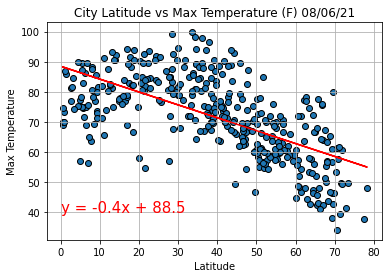

In [13]:
#setup the template to create plots with regression lines--will only need to 
#change labels and df columns
#I got this code mainly from the class matplotlib day three notebook
x_values = northern_data_df['Latitude']
y_values = northern_data_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(0,40), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Max Temperature (F) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/north_maxtemp_regression_scatter.png")

The linear regression shows us that maximum temperatures are generally likely to fall the further one moves north of the equator. The r-value of -.64 tells us that there is a strong negative relationship between increased city latitude and maximum temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.76


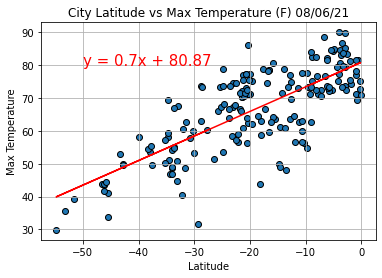

In [14]:
#make the same graph for southern latitudes
x_values = southern_data_df['Latitude']
y_values = southern_data_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(-50,80), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Max Temperature (F) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/south_maxtemp_regression_scatter.png")

This linear regression is similar to the past graph in that it also shows that maximum temperatures drop the further one goes from the equator. In this data set there is a more uniform distribution around the regression line, though the cities examined are not as far away from the equator as in the Northern Hemisphere. Lastly, the r-value of .76 indicates a very strong positive relationship between maximum temperature and increase in latitude as one moves toward the equator from further away in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.06


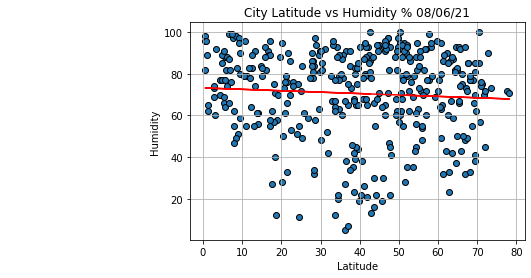

In [15]:
#make the same graph for southern latitudes
x_values = northern_data_df['Latitude']
y_values = northern_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(-50,20), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Humidity % {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/north_humidity_regression_scatter.png")

This graph coupled with the r-value shows that there is almost no correlation between latitude and humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.02


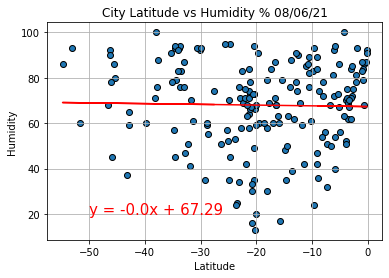

In [16]:
#make the same graph for southern latitudes
x_values = southern_data_df['Latitude']
y_values = southern_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(-50,20), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Humidity % {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/south_humidity_regression_scatter.png")

As in the Northern Hemisphere, there is almost no correlation between humidity and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.0


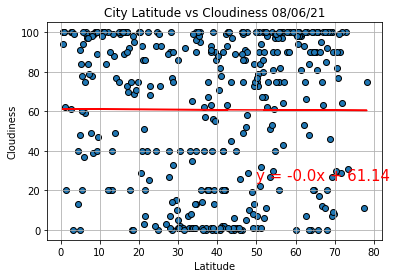

In [17]:
#make the same graph for southern latitudes
x_values = northern_data_df['Latitude']
y_values = northern_data_df['Cloud %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(50,25), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Cloudiness {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/north_cloudiness_regression_scatter.png")

Though the line of linear regression and r-value suggest there is not a correllation between latitude and cloudiness in the Northern Hemisphere, the distribution of the data suggest otherwise. As I detailed in the earlier scatterplot on cloudiness throughout all hemispheres, there are particular latitudinal ranges that are likely to either be far more, or far less cloudy. This remains true in the Northern Hemisphere (ex: latitude of 50-70 far more cloudy).

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.04


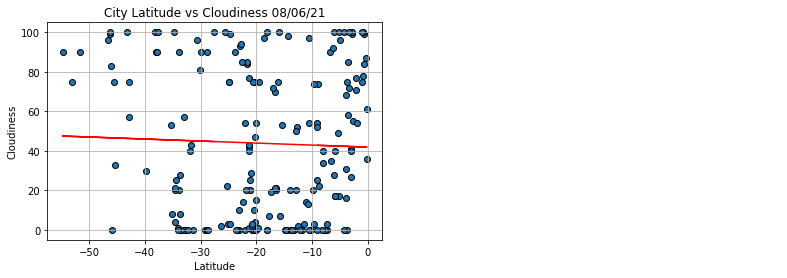

In [18]:
#make the same graph for southern latitudes
x_values = southern_data_df['Latitude']
y_values = southern_data_df['Cloud %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(50,25), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Cloudiness {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/south_cloudiness_regression_scatter.png")

The analysis of this graph is similar to the previous. Latitude does have a substantial impact on cloudiness in the sense that the least cloudy cities are clustered around particular latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.04


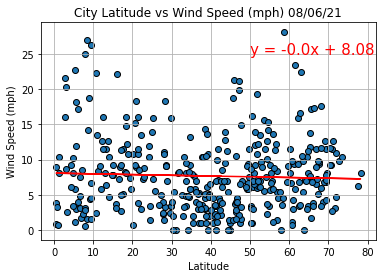

In [19]:
#make the same graph for southern latitudes
x_values = northern_data_df['Latitude']
y_values = northern_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(50,25), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Wind Speed (mph) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/north_wind_speed_regression_scatter.png")

There is essentially no correlation between wind speed and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21


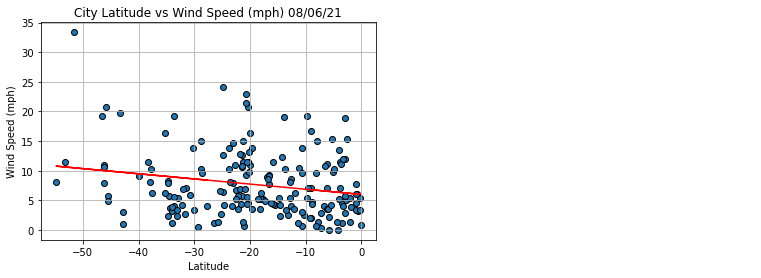

In [20]:
#make the same graph for southern latitudes
x_values = southern_data_df['Latitude']
y_values = southern_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(50,25), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Wind Speed (mph) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/south_wind_speed_regression_scatter.png")

As in the Northern Hemisphere, there does not appear to be a strong correlation between latitude and wind speed in the Southern Hemisphere.